## Regression-modell für Autos
Wir wollen eine Vorhersage treffen können, wie teuer ein Elektro-Auto aufgrund des PS-Standes

## Imports

In [2]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

c:\Users\luchu\Documents\GitHub\DA_LN_neues_Github\Analysen


## CSV Dateien Einlesen

In [3]:
autos_orig = pd.read_csv('../Ausgabedateien/autos_aufbereitet.csv')
autos_orig["Preis"] = autos_orig["Preis"].str.replace("'", "").str.strip()
autos_na =autos_orig.dropna(subset=['Preis', 'ps-stand', 'jahr'])
autos_na

,Unnamed: 0,web-scraper-order,web-scraper-start-url,Preis,plz,jahr,ps-stand,Farbe,PLZ4,%_IN_GDE,KTKZ,GDENR,GDENAMK,Hist.-Nummer,Kanton,Bezirks-nummer,Bezirksname,BFS Gde-nummer,Gemeindename,Datum der Aufnahme
1,1,1669622809-190,https://www.autolina.ch/elektro-auto,42500,6464,2022.0,204.0,weiss,6464.0,0.36,UR,1205.0,Bürglen (UR),11506.0,UR,400.0,Kt. Uri,1205,Bürglen (UR),1848-09-12
3,3,1669622809-192,https://www.autolina.ch/elektro-auto,44900,1184,2019.0,513.0,weiss,1184.0,100.00,VD,5858.0,Luins,14638.0,VD,2228.0,Nyon,5858,Luins,2006-09-01
9,9,1669622809-198,https://www.autolina.ch/elektro-auto,26450,6440,2020.0,145.0,grau,6440.0,99.54,SZ,1364.0,Ingenbohl,12657.0,SZ,506.0,Schwyz,1364,Ingenbohl,1848-09-12
10,10,1669622809-199,https://www.autolina.ch/elektro-auto,43899,8580,2017.0,525.0,blau,8580.0,0.51,SG,3202.0,Muolen,14379.0,SG,1721.0,St. Gallen,3202,Muolen,2003-01-01
11,11,1669622809-200,https://www.autolina.ch/elektro-auto,96699,8580,2021.0,573.0,weiss,8580.0,0.51,SG,3202.0,Muolen,14379.0,SG,1721.0,St. Gallen,3202,Muolen,2003-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,2307,1669622809-2496,https://www.autolina.ch/elektro-auto,79900,1163,2022.0,299.0,weiss,1163.0,100.00,VD,5636.0,Etoy,14703.0,VD,2227.0,Morges,5636,Etoy,2006-09-01
2207,2308,1669622809-2497,https://www.autolina.ch/elektro-auto,36890,1219,2021.0,136.0,weiss,1219.0,51.74,GE,6643.0,Vernier,10918.0,GE,2500.0,Cant. de Genève,6643,Vernier,1848-09-12
2208,2309,1669622809-2498,https://www.autolina.ch/elektro-auto,112790,4310,2022.0,503.0,schwarz,4310.0,98.50,AG,4258.0,Rheinfelden,12911.0,AG,1909.0,Rheinfelden,4258,Rheinfelden,1848-09-12
2210,2311,1669622809-2500,https://www.autolina.ch/elektro-auto,49800,3322,2022.0,218.0,blau,3322.0,100.00,BE,543.0,Mattstetten,15122.0,BE,246.0,Bern-Mittelland,543,Mattstetten,2010-01-01


## Train / Test Sample erstellen für ein einfaches Regressionsmodelll
Es muss ein Train / Test Sample erstellt werden. Das modelll soll den Preis voraussagen können in Abhängigkeit zur Variable PS-Stand

In [4]:
x = autos_na['ps-stand'].astype(float)
y = autos_na['Preis'].astype(float)


X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

print("Anzahl Werte für das Training", (len(X_train)))
print("Anzahl Werte für den Test", (len(X_test)))





Anzahl Werte für das Training 673
Anzahl Werte für den Test 289


In [5]:
# mit stats.linregress können alle wichtigen Kennzahlen zur linearen Regression ausgelesen werden
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)


print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            23856.69
Slope of regression line (beta):          124.519
p-value:                                  0.0000
R-squared (coefficient of determination): 0.4596


In [6]:
# Mit dieser methode können alle relevatnen Werte in einem Arry (lin_out) gespeichert werden (Es werden die gelichen Werte gespeichert wie in der Zelle oben)
lin_out = stats.linregress(X_train, y_train)

# Die Einzelnen Objekte können anschliessend einfach angesteuert werden mit lin_out[x]
print(lin_out)


LinregressResult(slope=124.51896894224704, intercept=23856.68766730349, rvalue=0.6779291866832006, pvalue=9.67640664347888e-92, stderr=5.212576277212048, intercept_stderr=1512.3299933869505)


## Graphisches Herleitung des einfachen Regressioin-modellls

Text(0.5, 0, 'PS-Stand')

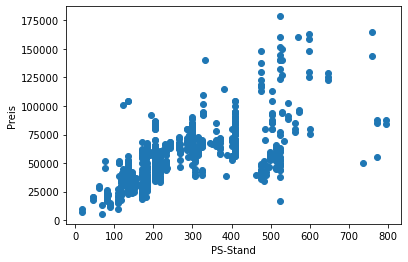

In [7]:
plt.scatter(x,y)
plt.ylabel("Preis")
plt.xlabel("PS-Stand")

Hier wird das modell definiert. Dafür werden die Werte aus "stats.lingress" verwendet. Die Formel für lineare Regression lautet: y = a + b * x

In [8]:
def modell(x):
    return lin_out[0] * x + lin_out[1]

Der Untenstehnde Graph zeigt nun die bestmögliche Gerade im Scatter-Plot auf (grüne Linie). Ständige Vorhersagen befinden sich auf dieser Gerade. 

Text(0.5, 0, 'PS-Stand')

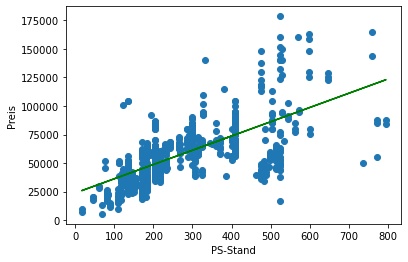

In [9]:
mymodell = pd.Series(map(modell, X_train))

plt.scatter(x,y)
plt.plot(X_train, mymodell, color='green')
plt.ylabel("Preis")
plt.xlabel("PS-Stand")

## Überprüfung des Einfachen Regressionsmodellls
mit dem erstellten Regressionsmodelll (Funktion: modell) können nun Preisvorhersagen getroffen werden. Mit dem Test-Datensatz kann anschliessend geprüft werden, wie akurat die Schätzung war.

In [10]:
print("Ergebnis Regressionsmodell:",modell(184), "\nTatsächliches Ergebnis (Testdatei):", y_test[789])

Ergebnis Regressionsmodell: 46768.177952676946 
Tatsächliches Ergebnis (Testdatei): 31900.0


Um sich ein besseres Bild der Qultät des modellls zu verschaffen, werden nun alle Differenzen zwischen den beobachteten(tatsächlichen) und den geschätzen Preisen in einer Liste abgespeichert. Diese differenzen referenzieren wir fortan als Residuen. 

In [11]:
i = 0
residuals = []
while i <= 200:
   test = X_test.iloc[i]
   print("Geschätzer pries:", modell(test), ", Tatsächlicher Preis", y_test.iloc[i])
   calculation = modell(test)-y_test.iloc[i]
   residuals.append(calculation)
   i = i + 1

Geschätzer pries: 46768.177952676946 , Tatsächlicher Preis 31900.0
Geschätzer pries: 64574.39051141827 , Tatsächlicher Preis 94950.0
Geschätzer pries: 59469.11278478615 , Tatsächlicher Preis 68900.0
Geschätzer pries: 39048.00187825763 , Tatsächlicher Preis 44527.0
Geschätzer pries: 49258.557331521886 , Tatsächlicher Preis 61900.0
Geschätzer pries: 93836.34821284632 , Tatsächlicher Preis 79900.0
Geschätzer pries: 40791.26744344909 , Tatsächlicher Preis 43200.0
Geschätzer pries: 61087.85938103535 , Tatsächlicher Preis 76640.0
Geschätzer pries: 49258.557331521886 , Tatsächlicher Preis 39999.0
Geschätzer pries: 49258.557331521886 , Tatsächlicher Preis 69800.0
Geschätzer pries: 61087.85938103535 , Tatsächlicher Preis 61800.0
Geschätzer pries: 64574.39051141827 , Tatsächlicher Preis 101400.0
Geschätzer pries: 46270.10207690796 , Tatsächlicher Preis 49990.0
Geschätzer pries: 61087.85938103535 , Tatsächlicher Preis 79900.0
Geschätzer pries: 87734.91873467622 , Tatsächlicher Preis 55900.0
Gesch

In [12]:
# Ausgabe der Residuen. 
residuals

[14868.177952676946,
 -30375.60948858173,
 -9430.88721521385,
 -5478.99812174237,
 -12641.442668478114,
 13936.348212846322,
 -2408.732556550909,
 -15552.140618964651,
 9259.557331521886,
 -20541.442668478114,
 -712.1406189646514,
 -36825.60948858173,
 -3719.8979230920377,
 -18812.14061896465,
 31834.91873467622,
 -5337.621650022396,
 21924.35693422123,
 2278.557331521886,
 -10812.140618964651,
 2808.557331521886,
 2551.8228967133473,
 11291.267443449091,
 -6645.785563001045,
 3019.926002488639,
 5358.557331521886,
 15034.533008640545,
 -39772.283116186925,
 10782.426995740287,
 -10641.442668478114,
 3458.557331521886,
 9360.041269704605,
 -641.4426684781138,
 -2664.6474264662247,
 30967.13420054251,
 -34241.442668478114,
 1201.8228967133473,
 41327.716883813075,
 3458.557331521886,
 -5045.785563001045,
 2059.49216363109,
 3920.5694929625606,
 -711.4426684781138,
 -14875.087612514515,
 1088.8593810353486,
 766.7484745068359,
 17775.275244202305,
 13848.963940373134,
 2278.557331521886,

Die Residuen werden in einem Graphen dargestellt. Je kleiner die Residuen sind desto kleiner ist der Unterschied zwischen den Geschätzten Werten des einfachen Regressionsmodells und den beobacheten Werten. Kleine Residuen deuten also auf ein gutes modell hin. Es ist im Graphen zu erkennen, dass die meisten Residuen um den Wert 0 bewegen. Es bestehen aber auch Residuen mit einer gorssen differenz. Grundsätzlich sollte das Modell aber relativ akkurate Vorhersagen treffen können. 

Text(0.5, 0, 'Abweichung in CHF')

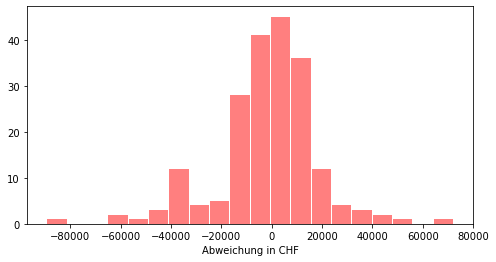

In [13]:
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=20, 
                            color='red',
                            alpha=0.5,
                            rwidth=0.95
                   )
plt.xlabel("Abweichung in CHF")

Es ist zu erkennen, dass die meisten mit dem modell geschätzen Werte nur geringfügig von den tatsächlichen Werten abweichen 

## Regressionsmodelll unter berücksichtigung einer weitern Variable (jahr)

Zuerst wird die Spalte "jahr" überprüft. Insbesondere unlogische Werte sollen ausgeschlossen werden. Auf dem Untenstehendne Graphen ist zu erkenne, wie die Werte Verteilt sind. Die überwiegende Mehrheit der Autos stammt aus den Jahrens 2020-2021.

(array([  3.,   1.,   3.,   6.,   5.,  22.,  16.,  66.,  96., 744.]),
 array([2011. , 2012.1, 2013.2, 2014.3, 2015.4, 2016.5, 2017.6, 2018.7,
        2019.8, 2020.9, 2022. ]),
 <BarContainer object of 10 artists>)

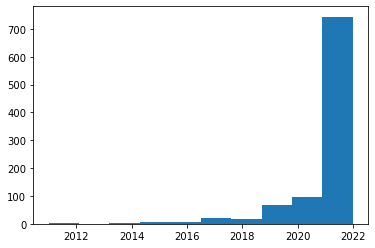

In [14]:
plt.hist(autos_na.jahr)

{'whiskers': [<matplotlib.lines.Line2D at 0x1eccd39f250>,
 'caps': [<matplotlib.lines.Line2D at 0x1eccd39f7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eccd384dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1eccd39fd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1eccd3ad0a0>],
 'means': []}

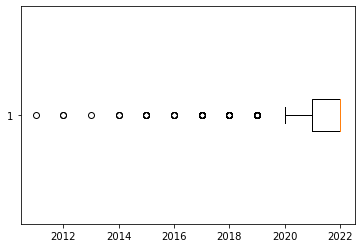

In [15]:
#Mit dem Boxplot soll die Verteilung etwas genauer dargestellt werden. Insbesondere die Ausreisser werden genau ausgewiesen. 
plt.boxplot(autos_na.jahr, vert=False)

Die untenstehdne Überprüfung der Minimalen und Maximalen Werte ergibt, dass das älteste Auto us dem jahr 2011 und das neuste aus 2022 Stammt. Dies sind plausieble Zahlen. Somit müssen keine Werte exkludiert werden

In [16]:
print("kleinster Wert ", np.min(autos_na.jahr))
print("grösster Wert ", np.max(autos_na.jahr))


kleinster Wert  2011.0
grösster Wert  2022.0


## Erstellen des Multiplen Regressionsmodells
Wie bei der einfachen Linearen regression wird zuerst ein train-/testsample kreiert. Der einzige Unterschied besteht darin, dass zwei Variabeln für x verwendet werden. 

In [17]:

X2_train, X2_test, y2_train, y2_test = train_test_split(autos_na[['ps-stand','jahr']], 
                                                        autos_na['Preis'], 
                                                        test_size=0.30, 
                                                        random_state=42)


# in x sind nun zwei Variabeln hinterlegt. Somit werden beide bei der Vorhersage des Preises berücksichigt
print('X2_train:')
print(X2_train.head(), '\n')


print('y2_train:')
print(y2_train.head())

X2_train:
      ps-stand    jahr
568      408.0  2020.0
759      136.0  2022.0
2204     598.0  2022.0
533      119.0  2022.0
186      136.0  2022.0 

y2_train:
568      69910
759      36900
2204    159000
533      32935
186      38570
Name: Preis, dtype: object


Um ein Mulitples Regressionsmodell zu "fitten" wird ols verwendet. 

In [18]:
# Definiere, die Abhängige Variable
X2_train_const = sm.add_constant(X2_train)

# Kreieren des modells
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

## Überprüfung des Multiplen Regressionsmodells

das Summary zeigt einige wichtige Kennzahlen an, um die Qualität des modellls zu beurteilen. 

R-squared: Der R-Squared ist mit einem Wert von 0.601 schon etwas weit entfenr vom Optimalen Wert von 1. Es liegt somit keine ausgesprochen starke Korrelation zwischen den Variabeln vorl

P-Wert P>|t|: Der P-Wert ist für alle Variabeln unter 0.05. Somit kann die 0 Hypothese bei einem Konfidenzintervall von 5% verworfen werden. Die daten sollten also einen tatsächlichen Zusammenhang aufweisen und nicht einfach zufällig so entstanden sein. 

In [19]:
# Zusammenfassung mit den wichtisten kennzahlen ausgeben
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preis   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     503.8
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          2.89e-134
Time:                        07:45:47   Log-Likelihood:                -7465.5
No. Observations:                 673   AIC:                         1.494e+04
Df Residuals:                     670   BIC:                         1.495e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.251e+07   8.15e+05    -15.353      0.0

Wie im Einfachen Linearen Regressionsmodell werden die Residuen angezeigt. Es zeichnet sich ein Ähnliches Bild. Die meisten Residuen schwanken um den Wert 0. Die Ausreser sind aber weniger dras

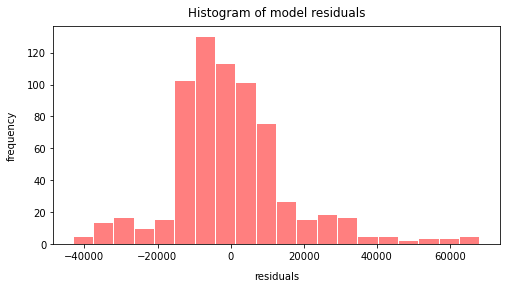

In [ ]:
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=20, 
                            color='red',
                            alpha=0.5,
                            rwidth=0.95
                   )
     

style.use()
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of modell residuals', fontsize=12, pad=10)


plt.show()

In [ ]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare predicted with observed price based on first 10 test samples
for i in range(0,10):
    print(f'Predicted price: {predicted_new.iloc[i]:.1f}, Observed price: {y_test.iloc[i]:.1f}')

Predicted price: 33632.0, Observed price: 31900.0
Predicted price: 70932.6, Observed price: 94950.0
Predicted price: 59370.5, Observed price: 68900.0
Predicted price: 44137.6, Observed price: 44527.0
Predicted price: 54855.6, Observed price: 61900.0
Predicted price: 83039.5, Observed price: 79900.0
Predicted price: 39764.3, Observed price: 43200.0
Predicted price: 67272.8, Observed price: 76640.0
Predicted price: 42449.3, Observed price: 39999.0
Predicted price: 48652.4, Observed price: 69800.0
